In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display_markdown
from scipy.stats import linregress
import random
import numpy as np

In [3]:
# https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete

In [4]:
#Bank Churners
bank_churners = pd.read_csv("BankChurners.csv")
bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
# Drop unneccesary columns
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]



In [6]:
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
bank_churners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
# Identify incomplete rows
bank_churners.count()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [8]:
bank_churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
# Summary Statistics for Churners
churners = bank_churners.loc[bank_churners["Attrition_Flag"]=="Attrited Customer"]
churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [54]:
churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age Groups
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,60 and over
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,60 and over
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,50s
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,50s
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,40's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,50s
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,40's
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,40's
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,30's


In [10]:
# Summary Statistics for Existing Customers
content = bank_churners.loc[bank_churners["Attrition_Flag"]=="Existing Customer"]
content.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


In [11]:
# Visualization of Average Utilization Ratio
churner_percentage = churners["Avg_Utilization_Ratio"].mean()
churner_percentage

content_percentage = content["Avg_Utilization_Ratio"].mean()
content_percentage

0.2964117647058824

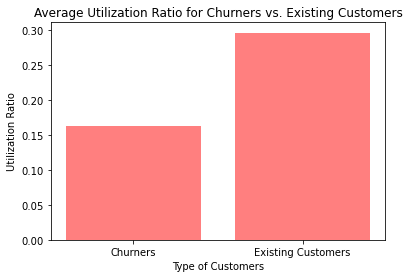

In [12]:
# Bar Graph of Average Utilization Ratio
customers = [churner_percentage, content_percentage]
x_axis = np.arange(len(customers))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Churners", "Existing Customers"])
plt.bar(x_axis, customers, color='r', alpha=0.5, align="center")
plt.title("Average Utilization Ratio for Churners vs. Existing Customers")
plt.ylabel("Utilization Ratio")
plt.xlabel("Type of Customers")
plt.show()

In [13]:
# Does Age affect churners?
churners["Customer_Age"].value_counts()
#bins for churners
bins = [20, 29, 39, 49, 59, 100]
group_names = ["20's", "30's", "40's", "50s", "60 and over"]
churners["Age Groups"] = pd.cut(churners["Customer_Age"], bins, labels=group_names, include_lowest=False)
churners

churners_by_age = churners.groupby("Age Groups").count()
churners_by_age

<ipython-input-13-1fbbb37b5dba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churners["Age Groups"] = pd.cut(churners["Customer_Age"], bins, labels=group_names, include_lowest=False)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Age Groups,,,,,,,,,,,,,,,,,,,,,
20's,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
30's,261,261,261,261,261,261,261,261,261,261,...,261,261,261,261,261,261,261,261,261,261
40's,772,772,772,772,772,772,772,772,772,772,...,772,772,772,772,772,772,772,772,772,772
50s,506,506,506,506,506,506,506,506,506,506,...,506,506,506,506,506,506,506,506,506,506
60 and over,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71


<function matplotlib.pyplot.show(close=None, block=None)>

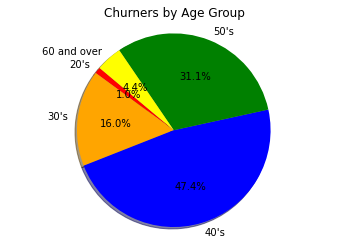

In [14]:
# Pie chart for number of churners by age
labels = ["20's", "30's", "40's", "50's","60 and over"]
sizes = [17, 261, 772, 506, 71]

colors = ["red", "orange", "blue", "green","yellow"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Churners by Age Group")
plt.axis("equal")

plt.show

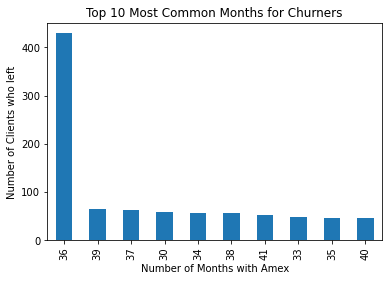

In [77]:
#Looking at Churners by How Long they had their cards churners["Months_on_book"].value_counts()
month_count = churners["Months_on_book"].value_counts().sort_values(ascending=False)
#plt.figsize(20,10)
month_count[:10].plot(kind='bar')
plt.title("Top 10 Most Common Months for Churners")
plt.xlabel("Number of Months with Amex")
plt.ylabel("Number of Clients who left")
plt.show()

In [16]:
#Reorganization of Churners and Months on Book
churners_by_time = churners[["Months_on_book", "CLIENTNUM"]]
client_counts = churners_by_time.groupby("Months_on_book").count()
client_counts["index"]=client_counts.index
client_counts

,CLIENTNUM,index
Months_on_book,,
13,7,13
14,1,14
15,9,15
16,3,16
17,4,17
18,13,18
19,6,19
20,13,20
21,10,21


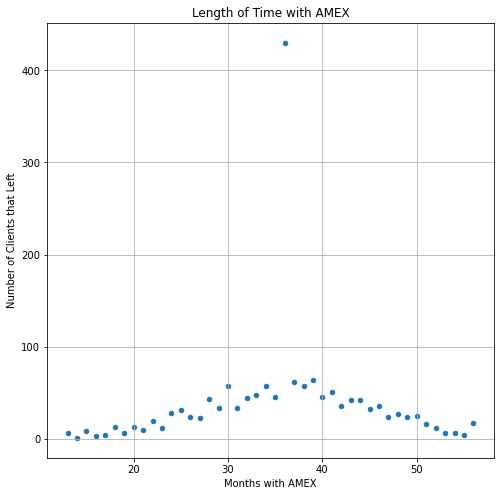

In [17]:
# Scatter Plot of Months on Book
client_counts.plot(kind="scatter", x= "index", y="CLIENTNUM", grid=True, figsize=(8,8), title= "Length of Time with AMEX")
plt.xlabel("Months with AMEX")
plt.ylabel("Number of Clients that Left")
plt.show()

In [22]:
#Looking at Churners by Education
#First, split the data into groups based on gender
churner_groups = churners.groupby("Education_Level")
churner_groups.head()
#Then, once the groups are made, count how many are in each group
churners_by_ed = churner_groups["CLIENTNUM"].count()
churners_by_ed


Education_Level
College          154
Doctorate         95
Graduate         487
High School      306
Post-Graduate     92
Uneducated       237
Unknown          256
Name: CLIENTNUM, dtype: int64

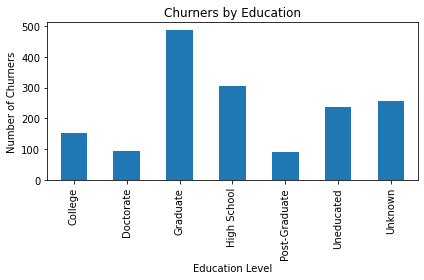

In [23]:
#Make chart based on education level
education_chart = churners_by_ed.plot(kind="bar")
plt.title("Churners by Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Churners")
plt.tight_layout()
plt.show()

In [28]:
# Looking at Churners via Income Level
#First, split the data into groups based on gender
churner_groups_income = churners.groupby("Income_Category")
#Then, once the groups are made, count how many are in each group
churners_by_income = churner_groups_income["CLIENTNUM"].count()
churners_by_income

Income_Category
$120K +           126
$40K - $60K       271
$60K - $80K       189
$80K - $120K      242
Less than $40K    612
Unknown           187
Name: CLIENTNUM, dtype: int64

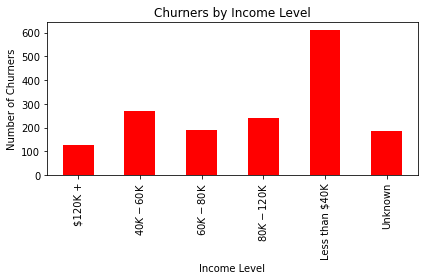

In [29]:
#Make chart based on income
income_chart = churners_by_income.plot(kind="bar", color="red")
plt.title("Churners by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Number of Churners")
plt.tight_layout()
plt.show()

In [30]:
#Churners by Marital Status
#First, split the data into groups based on gender
churner_groups_mar = churners.groupby("Marital_Status")
#Then, once the groups are made, count how many are in each group
churners_by_mar = churner_groups_mar["CLIENTNUM"].count()
churners_by_mar

Marital_Status
Divorced    121
Married     709
Single      668
Unknown     129
Name: CLIENTNUM, dtype: int64

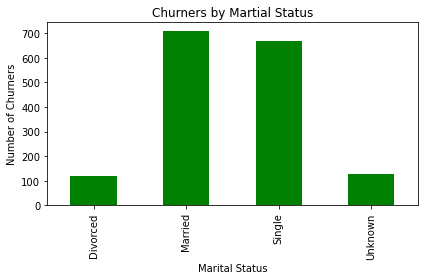

In [32]:
#Make chart based on Marital Status
income_chart = churners_by_mar.plot(kind="bar", color="green")
plt.title("Churners by Martial Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Churners")
plt.tight_layout()
plt.show()

In [36]:
#Looking at Churners by Total Revolving Balance
#churners_by_credit_limit = churners[["Credi", "CLIENTNUM"]]
churners_by_credit_limit = churners.groupby("Credit_Limit").count()
churners_by_credit_limit
#client_counts = churners_by_time.reset_index("Months_on_book")
churners_by_credit_limit["index"]=churners_by_credit_limit.index
churners_by_credit_limit

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age Groups,index
Credit_Limit,,,,,,,,,,,,,,,,,,,,,
1438.3,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,1438.3
1439.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1439.0
1440.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1440.0
1442.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1442.0
1443.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33384.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,33384.0
33870.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,33870.0
34140.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,34140.0


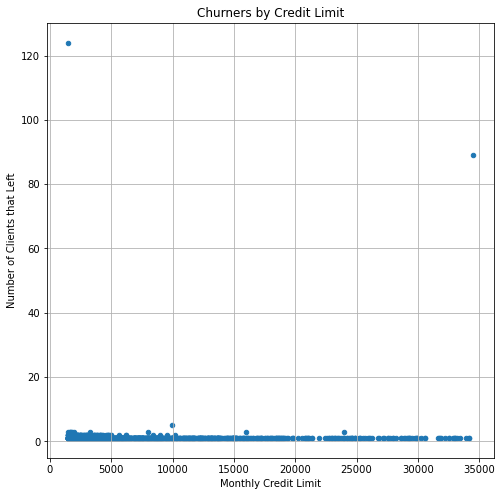

In [38]:
#Scatter Plot of Churners by Credit Limit
churners_by_credit_limit.plot(kind="scatter", x= "index", y="CLIENTNUM", grid=True, figsize=(8,8), title= "Churners by Credit Limit")
plt.xlabel("Monthly Credit Limit")
plt.ylabel("Number of Clients that Left")
plt.show()

In [43]:
#Churners by Total Revolving Balance
#Looking at Churners by Total Revolving Balance
#churners_by_credit_limit = churners[["Credi", "CLIENTNUM"]]
churners_by_revolving_balance = churners.groupby("Total_Revolving_Bal").count()
churners_by_revolving_balance
churners_by_revolving_balance["index"]=churners_by_revolving_balance.index
churners_by_revolving_balance

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age Groups,index
Total_Revolving_Bal,,,,,,,,,,,,,,,,,,,,,
0,893,893,893,893,893,893,893,893,893,893,...,893,893,893,893,893,893,893,893,893,0
132,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,132
134,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,134
145,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,145
154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2505
2507,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2507
2513,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2513


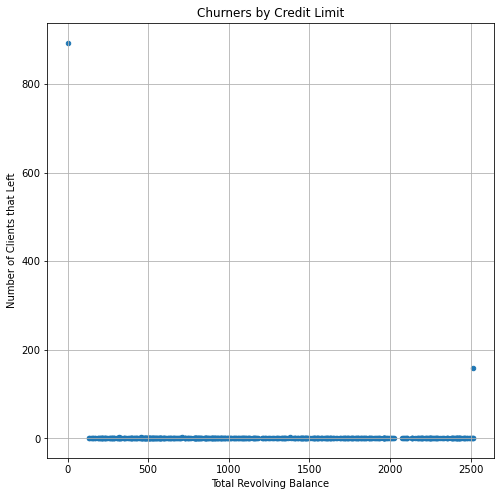

In [44]:
#Scatter Plot of Churners by Credit Limit
churners_by_revolving_balance.plot(kind="scatter", x= "index", y="CLIENTNUM", grid=True, figsize=(8,8), title= "Churners by Credit Limit")
plt.xlabel("Total Revolving Balance")
plt.ylabel("Number of Clients that Left")
plt.show()